In [1]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import pygimli as pg
from pygimli.physics import ert
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Setup package path for development
try:
    # For regular Python scripts
    current_dir = os.path.dirname(os.path.abspath(__file__))
except NameError:
    # For Jupyter notebooks
    current_dir = os.getcwd()

# Add the parent directory to Python path
parent_dir = os.path.dirname(current_dir)
if parent_dir not in sys.path:
    sys.path.append(parent_dir)

# Import PyHydroGeophysX modules
from PyHydroGeophysX.inversion.time_lapse import TimeLapseERTInversion
from PyHydroGeophysX.inversion.windowed import WindowedTimeLapseERTInversion

ImportError: cannot import name 'HydroModelOutput' from 'PyHydroGeophysX.model_output.base' (c:\users\hchen8\documents\github\pyhydrogeophysx\PyHydroGeophysX\model_output\base.py)

In [ ]:
data_dir = "results/TL_measurements/appres"

# List of ERT data files testing monthly time-lapse inversion
ert_files = [
    "synthetic_data30.dat",
    "synthetic_data60.dat",
    "synthetic_data90.dat",
    "synthetic_data120.dat",
    "synthetic_data150.dat",
    "synthetic_data180.dat",
    "synthetic_data210.dat",
    "synthetic_data240.dat",
    "synthetic_data270.dat",
    "synthetic_data300.dat",
    "synthetic_data330.dat",
    "synthetic_data360.dat",
]




## 1.Full Time-Lapse Inversion

In [ ]:
##################### FUll Time-Lapse Inversion #####################

# Full paths to data files
data_files = [os.path.join(data_dir, f) for f in ert_files]

# Measurement times (can be timestamps or any sequential numbers representing time)
measurement_times = [1, 2, 3, 4, 5, 6, 7 ,8, 9, 10, 11, 12]  # Adjust based on your actual acquisition times

# Create a mesh for the inversion (or load an existing one)
data = ert.load(data_files[0])
ert_manager = ert.ERTManager(data)
mesh = ert_manager.createMesh(data=data, quality=34)

# Set up inversion parameters
inversion_params = {
    "lambda_val": 10.0,              # Regularization parameter
    "alpha": 10.0,                   # Temporal regularization parameter
    "decay_rate": 0.0,               # Temporal decay rate
    "method": "cgls",                # Solver method ('cgls', 'lsqr', etc.)
    "model_constraints": (0.001, 1e4), # Min/max resistivity values (ohm-m)
    "max_iterations": 15,            # Maximum iterations
    "absoluteUError": 0.0,           # Absolute data error (V)
    "relativeError": 0.05,           # Relative data error (5%)
    "lambda_rate": 1.0,              # Lambda reduction rate
    "lambda_min": 1.0,               # Minimum lambda value
    "inversion_type": "L2"           # 'L1', 'L2', or 'L1L2'
}

# Create the time-lapse inversion object
inversion = TimeLapseERTInversion(
    data_files=data_files,
    measurement_times=measurement_times,
    mesh=mesh,
    **inversion_params
)

# Run the inversion
print("Starting time-lapse inversion...")
result = inversion.run()
print("Inversion complete!")

01/06/25 - 20:27:51 - pyGIMLi - INFO - Found 2 regions.
01/06/25 - 20:27:51 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
01/06/25 - 20:27:51 - pyGIMLi - INFO - Found 2 regions.
01/06/25 - 20:27:51 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
01/06/25 - 20:27:51 - pyGIMLi - INFO - Found 2 regions.
01/06/25 - 20:27:51 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
01/06/25 - 20:27:51 - pyGIMLi - INFO - Found 2 regions.
01/06/25 - 20:27:51 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
01/06/25 - 20:27:51 - pyGIMLi - INFO - Found 2 regions.
01/06/25 - 20:27:51 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
01/06/25 - 20:27:51 - pyGIMLi - INFO - Found 2 regions.
01/06/25 - 20:27:51 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
01/06/25 - 20:27:51 - pyGIMLi - IN

Starting time-lapse inversion...


01/06/25 - 20:27:52 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
01/06/25 - 20:27:52 - pyGIMLi - INFO - Found 2 regions.
01/06/25 - 20:27:52 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
01/06/25 - 20:27:52 - pyGIMLi - INFO - Found 2 regions.
01/06/25 - 20:27:52 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
01/06/25 - 20:27:52 - pyGIMLi - INFO - Creating forward mesh from region infos.
01/06/25 - 20:27:52 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
01/06/25 - 20:27:52 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884


-6.907755278982137 9.210340371976184
-------------------ERT Iteration: 0 ---------------------------


01/06/25 - 20:28:01 - pyGIMLi - INFO - Creating forward mesh from region infos.
01/06/25 - 20:28:01 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
01/06/25 - 20:28:01 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884
01/06/25 - 20:28:09 - pyGIMLi - INFO - Creating forward mesh from region infos.
01/06/25 - 20:28:09 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
01/06/25 - 20:28:09 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884
01/06/25 - 20:28:17 - pyGIMLi - INFO - Creating forward mesh from region infos.
01/06/25 - 20:28:17 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
01/06/25 - 20:28:17 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884
01/06/25 - 20:28:25 - pyGIMLi - INFO - Creating forward mesh from region infos.
01/06/25 - 20:28:25 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward tas

ERT chi2: 2345.302026235805
dPhi: 1.0
ERTphi_d: 23302920.932678957, ERTphi_m: 0.0, ERTphi_t: 0.0
-------------------ERT Iteration: 1 ---------------------------
ERT chi2: 69.0802989004589
dPhi: 0.9705452440122042
ERTphi_d: 686381.8498749596, ERTphi_m: 19434.306119675435, ERTphi_t: 7058.19628504782
-------------------ERT Iteration: 2 ---------------------------
ERT chi2: 3.072932988338752
dPhi: 0.9555165070613448
ERTphi_d: 30532.662172133838, ERTphi_m: 8004.699814521861, ERTphi_t: 6956.299203494395
-------------------ERT Iteration: 3 ---------------------------
ERT chi2: 2.6312091248729517
dPhi: 0.1437466632504079
ERTphi_d: 26143.69386473765, ERTphi_m: 7574.51731713914, ERTphi_t: 6969.92957467512
-------------------ERT Iteration: 4 ---------------------------
ERT chi2: 2.680128371039954
dPhi: 0.018591926314243293
ERTphi_d: 26629.755494652985, ERTphi_m: 6721.347318429703, ERTphi_t: 6923.535544091111
-------------------ERT Iteration: 5 ---------------------------
ERT chi2: 2.4715318805167

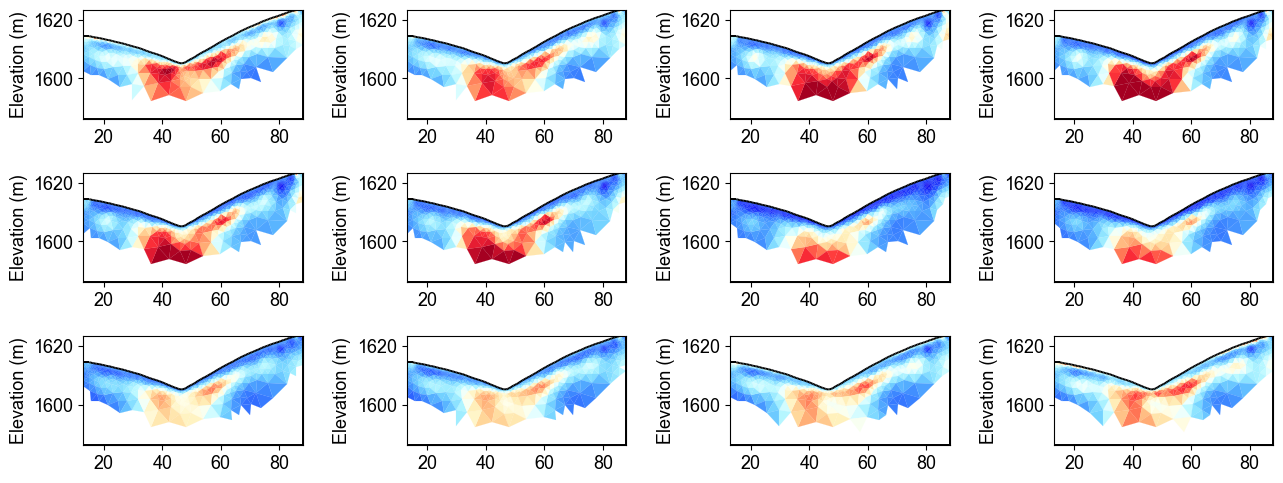

In [ ]:
from palettable.lightbartlein.diverging import BlueDarkRed18_18
fixed_cmap = BlueDarkRed18_18.mpl_colormap

fig = plt.figure(figsize=[16,6])

# True resistivity model
for i in range(12):
    ax = fig.add_subplot(3,4,i+1)
    ax, cbar = pg.show(result.mesh,result.final_models[:,i],pad=0.3,orientation="vertical",cMap=fixed_cmap,cMin= 100,cMax = 3000
                    , ylabel="Elevation (m)",label=' Resistivity ($\Omega$ m)',ax=ax,logScale=False,coverage=result.all_coverage[i]>-1)
    cbar.remove()

## 2. Window time-lapse inversion

In [ ]:
# Measurement times (can be timestamps or any sequential numbers representing time)
measurement_times = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]  # Adjust based on your actual acquisition times

# Create a mesh for the inversion (or load an existing one)
data = ert.load(os.path.join(data_dir, ert_files[0]))
ert_manager = ert.ERTManager(data)
mesh = ert_manager.createMesh(data=data, quality=34)

# Set up inversion parameters
inversion_params = {
    "lambda_val": 10.0,              # Regularization parameter
    "alpha": 10.0,                   # Temporal regularization parameter
    "decay_rate": 0.0,               # Temporal decay rate
    "method": "cgls",                # Solver method ('cgls', 'lsqr', etc.)
    "model_constraints": (0.001, 1e4), # Min/max resistivity values (ohm-m)
    "max_iterations": 15,            # Maximum iterations
    "absoluteUError": 0.0,           # Absolute data error (V)
    "relativeError": 0.05,           # Relative data error (5%)
    "lambda_rate": 1.0,              # Lambda reduction rate
    "lambda_min": 1.0,               # Minimum lambda value
    "inversion_type": "L2"           # 'L1', 'L2', or 'L1L2'
}

# Define the window size (number of timesteps to process together)
window_size = 3  # A window size of 3 means each window includes 3 consecutive measurements

# Create the windowed time-lapse inversion object
inversion = WindowedTimeLapseERTInversion(
    data_dir=data_dir,               # Directory containing ERT data files
    ert_files=ert_files,             # List of ERT data filenames
    measurement_times=measurement_times,  # List of measurement times
    window_size=window_size,         # Size of sliding window
    mesh=mesh,                       # Mesh for inversion
    **inversion_params               # Pass the same inversion parameters
)

# Run the inversion, optionally in parallel
print("Starting windowed time-lapse inversion...")
result = inversion.run()
print("Inversion complete!")


01/06/25 - 20:46:03 - pyGIMLi - INFO - Found 2 regions.
01/06/25 - 20:46:03 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


Starting windowed time-lapse inversion...

Processing 10 windows sequentially...
Using L2 inversion

Starting L2 inversion for window 0


01/06/25 - 20:46:05 - pyGIMLi - INFO - Found 2 regions.
01/06/25 - 20:46:05 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
01/06/25 - 20:46:05 - pyGIMLi - INFO - Found 2 regions.
01/06/25 - 20:46:05 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
01/06/25 - 20:46:05 - pyGIMLi - INFO - Found 2 regions.
01/06/25 - 20:46:05 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
01/06/25 - 20:46:05 - pyGIMLi - INFO - Creating forward mesh from region infos.
01/06/25 - 20:46:05 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
01/06/25 - 20:46:05 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884


-6.907755278982137 9.210340371976184
-------------------ERT Iteration: 0 ---------------------------


01/06/25 - 20:46:13 - pyGIMLi - INFO - Creating forward mesh from region infos.
01/06/25 - 20:46:13 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
01/06/25 - 20:46:14 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884
01/06/25 - 20:46:21 - pyGIMLi - INFO - Creating forward mesh from region infos.
01/06/25 - 20:46:21 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
01/06/25 - 20:46:21 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884


ERT chi2: 2614.857697445681
dPhi: 1.0
ERTphi_d: 6495306.520455072, ERTphi_m: 0.0, ERTphi_t: 0.0
-------------------ERT Iteration: 1 ---------------------------
ERT chi2: 33.238214418697304
dPhi: 0.9872887100314613
ERTphi_d: 82563.7246160441, ERTphi_m: 3596.887024926823, ERTphi_t: 2011.290838306766
-------------------ERT Iteration: 2 ---------------------------
ERT chi2: 10.130462351950804
dPhi: 0.6952164089099753
ERTphi_d: 25164.0684822458, ERTphi_m: 2291.341512439801, ERTphi_t: 1958.2764944321937
-------------------ERT Iteration: 3 ---------------------------
ERT chi2: 1.6681747402839964
dPhi: 0.8353308385808512
ERTphi_d: 4143.746054865447, ERTphi_m: 1241.0547776604133, ERTphi_t: 1927.2842938837625
-------------------ERT Iteration: 4 ---------------------------
ERT chi2: 1.4949150859396667
dPhi: 0.10386181384980886
ERTphi_d: 3713.369073474132, ERTphi_m: 1001.1923396511154, ERTphi_t: 1925.5751498025093
Convergence reached at iteration 4
End of inversion

Window 0 results:
Model shape: 

01/06/25 - 20:47:10 - pyGIMLi - INFO - Found 2 regions.
01/06/25 - 20:47:10 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
01/06/25 - 20:47:10 - pyGIMLi - INFO - Found 2 regions.
01/06/25 - 20:47:10 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
01/06/25 - 20:47:10 - pyGIMLi - INFO - Found 2 regions.
01/06/25 - 20:47:10 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
01/06/25 - 20:47:10 - pyGIMLi - INFO - Creating forward mesh from region infos.
01/06/25 - 20:47:10 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
01/06/25 - 20:47:10 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884


-6.907755278982137 9.210340371976184
-------------------ERT Iteration: 0 ---------------------------


01/06/25 - 20:47:18 - pyGIMLi - INFO - Creating forward mesh from region infos.
01/06/25 - 20:47:18 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
01/06/25 - 20:47:18 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884
01/06/25 - 20:47:26 - pyGIMLi - INFO - Creating forward mesh from region infos.
01/06/25 - 20:47:26 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
01/06/25 - 20:47:26 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884


ERT chi2: 2424.799586453877
dPhi: 1.0
ERTphi_d: 6023202.17275143, ERTphi_m: 0.0, ERTphi_t: 0.0
-------------------ERT Iteration: 1 ---------------------------
ERT chi2: 27.7842372927561
dPhi: 0.9885416355858965
ERTphi_d: 69016.04543520615, ERTphi_m: 3486.4597298293047, ERTphi_t: 201.26159736318442
-------------------ERT Iteration: 2 ---------------------------
ERT chi2: 10.5038071609411
dPhi: 0.6219508547143149
ERTphi_d: 26091.456987777692, ERTphi_m: 2139.6067495013226, ERTphi_t: 191.06117626552964
-------------------ERT Iteration: 3 ---------------------------
ERT chi2: 1.3410881368289391
dPhi: 0.8723236140686362
ERTphi_d: 3331.262931883085, ERTphi_m: 1072.1760209693202, ERTphi_t: 185.34455999405168
Convergence reached at iteration 3
End of inversion

Window 1 results:
Model shape: (1364, 3)
Coverage available: True
Number of iterations: 4

Starting L2 inversion for window 2


01/06/25 - 20:48:03 - pyGIMLi - INFO - Found 2 regions.
01/06/25 - 20:48:03 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
01/06/25 - 20:48:03 - pyGIMLi - INFO - Found 2 regions.
01/06/25 - 20:48:03 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
01/06/25 - 20:48:03 - pyGIMLi - INFO - Found 2 regions.
01/06/25 - 20:48:03 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
01/06/25 - 20:48:03 - pyGIMLi - INFO - Creating forward mesh from region infos.
01/06/25 - 20:48:03 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
01/06/25 - 20:48:03 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884


-6.907755278982137 9.210340371976184
-------------------ERT Iteration: 0 ---------------------------


01/06/25 - 20:48:11 - pyGIMLi - INFO - Creating forward mesh from region infos.
01/06/25 - 20:48:11 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
01/06/25 - 20:48:11 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884
01/06/25 - 20:48:19 - pyGIMLi - INFO - Creating forward mesh from region infos.
01/06/25 - 20:48:19 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
01/06/25 - 20:48:19 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884


ERT chi2: 2361.2976889094757
dPhi: 1.0
ERTphi_d: 5865463.459251137, ERTphi_m: 0.0, ERTphi_t: 0.0
-------------------ERT Iteration: 1 ---------------------------
ERT chi2: 26.121298176181675
dPhi: 0.9889377361021153
ERTphi_d: 64885.30466963528, ERTphi_m: 3482.455467969924, ERTphi_t: 270.6043109549058
-------------------ERT Iteration: 2 ---------------------------
ERT chi2: 10.454544404478511
dPhi: 0.5997693401773065
ERTphi_d: 25969.088300724623, ERTphi_m: 2072.7027866209846, ERTphi_t: 265.2143516793451
-------------------ERT Iteration: 3 ---------------------------
ERT chi2: 1.3793653614868233
dPhi: 0.8680606913012937
ERTphi_d: 3426.343557933269, ERTphi_m: 1065.6876859551076, ERTphi_t: 262.4370588863169
Convergence reached at iteration 3
End of inversion

Window 2 results:
Model shape: (1364, 3)
Coverage available: True
Number of iterations: 4

Starting L2 inversion for window 3


01/06/25 - 20:48:55 - pyGIMLi - INFO - Found 2 regions.
01/06/25 - 20:48:55 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
01/06/25 - 20:48:55 - pyGIMLi - INFO - Found 2 regions.
01/06/25 - 20:48:55 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
01/06/25 - 20:48:56 - pyGIMLi - INFO - Found 2 regions.
01/06/25 - 20:48:56 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
01/06/25 - 20:48:56 - pyGIMLi - INFO - Creating forward mesh from region infos.
01/06/25 - 20:48:56 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
01/06/25 - 20:48:56 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884


-6.907755278982137 9.210340371976184
-------------------ERT Iteration: 0 ---------------------------


01/06/25 - 20:49:04 - pyGIMLi - INFO - Creating forward mesh from region infos.
01/06/25 - 20:49:04 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
01/06/25 - 20:49:04 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884
01/06/25 - 20:49:12 - pyGIMLi - INFO - Creating forward mesh from region infos.
01/06/25 - 20:49:12 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
01/06/25 - 20:49:12 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884


ERT chi2: 2335.406380855519
dPhi: 1.0
ERTphi_d: 5801149.450045109, ERTphi_m: 0.0, ERTphi_t: 0.0
-------------------ERT Iteration: 1 ---------------------------
ERT chi2: 25.680200622091313
dPhi: 0.9890039691453253
ERTphi_d: 63789.61834527482, ERTphi_m: 3470.408948724509, ERTphi_t: 245.22583441484153
-------------------ERT Iteration: 2 ---------------------------
ERT chi2: 10.172065008646765
dPhi: 0.6038946440357527
ERTphi_d: 25267.409481478564, ERTphi_m: 2011.9800120778643, ERTphi_t: 246.83371729630375
-------------------ERT Iteration: 3 ---------------------------
ERT chi2: 1.3314586358864693
dPhi: 0.8691063579760193
ERTphi_d: 3307.34325154199, ERTphi_m: 1027.439344855619, ERTphi_t: 238.35315552011116
Convergence reached at iteration 3
End of inversion

Window 3 results:
Model shape: (1364, 3)
Coverage available: True
Number of iterations: 4

Starting L2 inversion for window 4


01/06/25 - 20:49:48 - pyGIMLi - INFO - Found 2 regions.
01/06/25 - 20:49:48 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
01/06/25 - 20:49:48 - pyGIMLi - INFO - Found 2 regions.
01/06/25 - 20:49:48 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
01/06/25 - 20:49:48 - pyGIMLi - INFO - Found 2 regions.
01/06/25 - 20:49:48 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
01/06/25 - 20:49:48 - pyGIMLi - INFO - Creating forward mesh from region infos.
01/06/25 - 20:49:48 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
01/06/25 - 20:49:48 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884


-6.907755278982137 9.210340371976184
-------------------ERT Iteration: 0 ---------------------------


01/06/25 - 20:49:56 - pyGIMLi - INFO - Creating forward mesh from region infos.
01/06/25 - 20:49:56 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
01/06/25 - 20:49:56 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884
01/06/25 - 20:50:04 - pyGIMLi - INFO - Creating forward mesh from region infos.
01/06/25 - 20:50:04 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
01/06/25 - 20:50:04 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884


ERT chi2: 2119.5610754349227
dPhi: 1.0
ERTphi_d: 5264989.711380348, ERTphi_m: 0.0, ERTphi_t: 0.0
-------------------ERT Iteration: 1 ---------------------------
ERT chi2: 22.87676436916872
dPhi: 0.9892068387958699
ERTphi_d: 56825.8826930151, ERTphi_m: 3440.430599213737, ERTphi_t: 1907.60822985196
-------------------ERT Iteration: 2 ---------------------------
ERT chi2: 9.916224509601559
dPhi: 0.5665372799413115
ERTphi_d: 24631.90168185027, ERTphi_m: 1880.7899519966597, ERTphi_t: 1877.8896473579289
-------------------ERT Iteration: 3 ---------------------------
ERT chi2: 1.4221148221375355
dPhi: 0.8565870689232028
ERTphi_d: 3532.5332181896383, ERTphi_m: 1033.3949586587614, ERTphi_t: 1887.8201916014143
Convergence reached at iteration 3
End of inversion

Window 4 results:
Model shape: (1364, 3)
Coverage available: True
Number of iterations: 4

Starting L2 inversion for window 5


01/06/25 - 20:50:40 - pyGIMLi - INFO - Found 2 regions.
01/06/25 - 20:50:40 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
01/06/25 - 20:50:40 - pyGIMLi - INFO - Found 2 regions.
01/06/25 - 20:50:40 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
01/06/25 - 20:50:40 - pyGIMLi - INFO - Found 2 regions.
01/06/25 - 20:50:40 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
01/06/25 - 20:50:40 - pyGIMLi - INFO - Creating forward mesh from region infos.
01/06/25 - 20:50:40 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
01/06/25 - 20:50:40 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884


-6.907755278982137 9.210340371976184
-------------------ERT Iteration: 0 ---------------------------


01/06/25 - 20:50:48 - pyGIMLi - INFO - Creating forward mesh from region infos.
01/06/25 - 20:50:48 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
01/06/25 - 20:50:48 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884
01/06/25 - 20:50:56 - pyGIMLi - INFO - Creating forward mesh from region infos.
01/06/25 - 20:50:56 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
01/06/25 - 20:50:56 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884


ERT chi2: 1950.723115414603
dPhi: 1.0
ERTphi_d: 4845596.218689874, ERTphi_m: 0.0, ERTphi_t: 0.0
-------------------ERT Iteration: 1 ---------------------------
ERT chi2: 21.555095549106586
dPhi: 0.9889502024255629
ERTphi_d: 53542.85734398076, ERTphi_m: 3352.992658105426, ERTphi_t: 1919.9366142225108
-------------------ERT Iteration: 2 ---------------------------
ERT chi2: 9.704801886892664
dPhi: 0.549767623864933
ERTphi_d: 24106.72788704138, ERTphi_m: 1834.555748013314, ERTphi_t: 1909.1628847080403
-------------------ERT Iteration: 3 ---------------------------
ERT chi2: 1.4267702209361979
dPhi: 0.8529830657477718
ERTphi_d: 3544.0972288055154, ERTphi_m: 1033.3750660873382, ERTphi_t: 1919.5873927368784
Convergence reached at iteration 3
End of inversion

Window 5 results:
Model shape: (1364, 3)
Coverage available: True
Number of iterations: 4

Starting L2 inversion for window 6


01/06/25 - 20:51:32 - pyGIMLi - INFO - Found 2 regions.
01/06/25 - 20:51:32 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
01/06/25 - 20:51:32 - pyGIMLi - INFO - Found 2 regions.
01/06/25 - 20:51:32 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
01/06/25 - 20:51:32 - pyGIMLi - INFO - Found 2 regions.
01/06/25 - 20:51:32 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
01/06/25 - 20:51:32 - pyGIMLi - INFO - Creating forward mesh from region infos.
01/06/25 - 20:51:32 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
01/06/25 - 20:51:32 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884


-6.907755278982137 9.210340371976184
-------------------ERT Iteration: 0 ---------------------------


01/06/25 - 20:51:40 - pyGIMLi - INFO - Creating forward mesh from region infos.
01/06/25 - 20:51:40 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
01/06/25 - 20:51:41 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884
01/06/25 - 20:51:49 - pyGIMLi - INFO - Creating forward mesh from region infos.
01/06/25 - 20:51:49 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
01/06/25 - 20:51:49 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884


ERT chi2: 1883.650824187547
dPhi: 1.0
ERTphi_d: 4678988.6472818665, ERTphi_m: 0.0, ERTphi_t: 0.0
-------------------ERT Iteration: 1 ---------------------------
ERT chi2: 23.346442610969362
dPhi: 0.9876057482038694
ERTphi_d: 57992.563445647895, ERTphi_m: 3232.53209286083, ERTphi_t: 1355.5323422569043
-------------------ERT Iteration: 2 ---------------------------
ERT chi2: 9.512661882101717
dPhi: 0.5925434105480302
ERTphi_d: 23629.452115140666, ERTphi_m: 1809.0569699295086, ERTphi_t: 1314.1806497204686
-------------------ERT Iteration: 3 ---------------------------
ERT chi2: 1.4686572289650597
dPhi: 0.8456102774210474
ERTphi_d: 3648.1445567492083, ERTphi_m: 1014.3859790365838, ERTphi_t: 1327.8067036360926
Convergence reached at iteration 3
End of inversion

Window 6 results:
Model shape: (1364, 3)
Coverage available: True
Number of iterations: 4

Starting L2 inversion for window 7


01/06/25 - 20:52:26 - pyGIMLi - INFO - Found 2 regions.
01/06/25 - 20:52:26 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
01/06/25 - 20:52:26 - pyGIMLi - INFO - Found 2 regions.
01/06/25 - 20:52:26 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
01/06/25 - 20:52:26 - pyGIMLi - INFO - Found 2 regions.
01/06/25 - 20:52:26 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
01/06/25 - 20:52:26 - pyGIMLi - INFO - Creating forward mesh from region infos.
01/06/25 - 20:52:26 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
01/06/25 - 20:52:26 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884


-6.907755278982137 9.210340371976184
-------------------ERT Iteration: 0 ---------------------------


01/06/25 - 20:52:35 - pyGIMLi - INFO - Creating forward mesh from region infos.
01/06/25 - 20:52:35 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
01/06/25 - 20:52:35 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884
01/06/25 - 20:52:43 - pyGIMLi - INFO - Creating forward mesh from region infos.
01/06/25 - 20:52:43 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
01/06/25 - 20:52:43 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884


ERT chi2: 2080.9823041318746
dPhi: 1.0
ERTphi_d: 5169160.043463577, ERTphi_m: 0.0, ERTphi_t: 0.0
-------------------ERT Iteration: 1 ---------------------------
ERT chi2: 29.024024661935005
dPhi: 0.9860527287501164
ERTphi_d: 72095.67726024655, ERTphi_m: 3175.7323709051184, ERTphi_t: 1436.8993283240752
-------------------ERT Iteration: 2 ---------------------------
ERT chi2: 9.604457756896064
dPhi: 0.6690859428088791
ERTphi_d: 23857.473068129824, ERTphi_m: 1903.16352090924, ERTphi_t: 1377.9250808609931
-------------------ERT Iteration: 3 ---------------------------
ERT chi2: 1.5460574812727133
dPhi: 0.8390270934178836
ERTphi_d: 3840.4067834814196, ERTphi_m: 1023.0896069023893, ERTphi_t: 1379.543321873214
-------------------ERT Iteration: 4 ---------------------------
ERT chi2: 1.3207547430285291
dPhi: 0.1457272714457648
ERTphi_d: 3280.7547816828665, ERTphi_m: 848.3569507992399, ERTphi_t: 1384.560147720454
Convergence reached at iteration 4
End of inversion

Window 7 results:
Model shape

01/06/25 - 20:53:30 - pyGIMLi - INFO - Found 2 regions.
01/06/25 - 20:53:30 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
01/06/25 - 20:53:30 - pyGIMLi - INFO - Found 2 regions.
01/06/25 - 20:53:30 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
01/06/25 - 20:53:30 - pyGIMLi - INFO - Found 2 regions.
01/06/25 - 20:53:30 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
01/06/25 - 20:53:30 - pyGIMLi - INFO - Creating forward mesh from region infos.
01/06/25 - 20:53:30 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
01/06/25 - 20:53:30 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884


-6.907755278982137 9.210340371976184
-------------------ERT Iteration: 0 ---------------------------


01/06/25 - 20:53:38 - pyGIMLi - INFO - Creating forward mesh from region infos.
01/06/25 - 20:53:39 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
01/06/25 - 20:53:39 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884
01/06/25 - 20:53:47 - pyGIMLi - INFO - Creating forward mesh from region infos.
01/06/25 - 20:53:47 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
01/06/25 - 20:53:47 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884


ERT chi2: 2339.9500473783282
dPhi: 1.0
ERTphi_d: 5812435.917687767, ERTphi_m: 0.0, ERTphi_t: 0.0
-------------------ERT Iteration: 1 ---------------------------
ERT chi2: 35.416369071310235
dPhi: 0.9848644764400032
ERTphi_d: 87974.26077313462, ERTphi_m: 3251.1791309867363, ERTphi_t: 688.9491536831194
-------------------ERT Iteration: 2 ---------------------------
ERT chi2: 10.099834605186839
dPhi: 0.7148258031518985
ERTphi_d: 25087.98915928411, ERTphi_m: 1984.3028147230575, ERTphi_t: 664.9565692535248
-------------------ERT Iteration: 3 ---------------------------
ERT chi2: 1.578743885475825
dPhi: 0.8436861644580743
ERTphi_d: 3921.599811521949, ERTphi_m: 1014.1742559570232, ERTphi_t: 668.8429938443978
-------------------ERT Iteration: 4 ---------------------------
ERT chi2: 1.3056800311535166
dPhi: 0.1729627312159048
ERTphi_d: 3243.309197385335, ERTphi_m: 815.3605820999297, ERTphi_t: 669.5483272206263
Convergence reached at iteration 4
End of inversion

Window 8 results:
Model shape: (

01/06/25 - 20:54:35 - pyGIMLi - INFO - Found 2 regions.
01/06/25 - 20:54:35 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
01/06/25 - 20:54:35 - pyGIMLi - INFO - Found 2 regions.
01/06/25 - 20:54:35 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
01/06/25 - 20:54:35 - pyGIMLi - INFO - Found 2 regions.
01/06/25 - 20:54:35 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
01/06/25 - 20:54:35 - pyGIMLi - INFO - Creating forward mesh from region infos.
01/06/25 - 20:54:35 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
01/06/25 - 20:54:35 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884


-6.907755278982137 9.210340371976184
-------------------ERT Iteration: 0 ---------------------------


01/06/25 - 20:54:43 - pyGIMLi - INFO - Creating forward mesh from region infos.
01/06/25 - 20:54:43 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
01/06/25 - 20:54:43 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884
01/06/25 - 20:54:51 - pyGIMLi - INFO - Creating forward mesh from region infos.
01/06/25 - 20:54:51 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
01/06/25 - 20:54:51 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884


ERT chi2: 2547.2932024544716
dPhi: 1.0
ERTphi_d: 6327476.314896908, ERTphi_m: 0.0, ERTphi_t: 0.0
-------------------ERT Iteration: 1 ---------------------------
ERT chi2: 38.300243859198766
dPhi: 0.9849643363307002
ERTphi_d: 95137.80574624974, ERTphi_m: 3530.662344822941, ERTphi_t: 926.0099054368932
-------------------ERT Iteration: 2 ---------------------------
ERT chi2: 10.693719728711333
dPhi: 0.7207923853429208
ERTphi_d: 26563.19980611895, ERTphi_m: 2279.2212531224327, ERTphi_t: 889.631081446932
-------------------ERT Iteration: 3 ---------------------------
ERT chi2: 1.5718395077978866
dPhi: 0.8530128385936945
ERTphi_d: 3904.4493373699506, ERTphi_m: 1259.7916910238077, ERTphi_t: 890.6515398909139
-------------------ERT Iteration: 4 ---------------------------
ERT chi2: 1.3381149207856398
dPhi: 0.14869494363307484
ERTphi_d: 3323.8774632315294, ERTphi_m: 1038.5915832011738, ERTphi_t: 893.3941444347324
Convergence reached at iteration 4
End of inversion

Window 9 results:
Model shape

In [ ]:
result.final_models = np.array(result.final_models)
result.final_models.shape

(1364, 12)

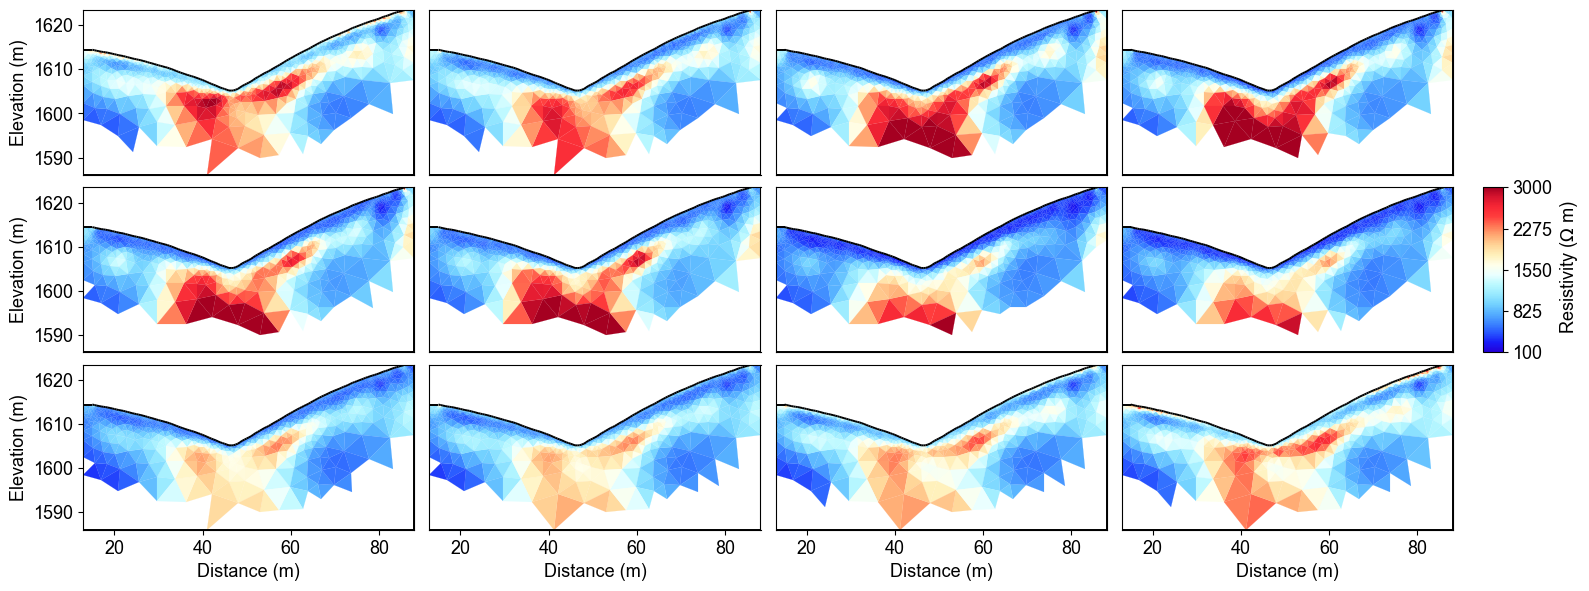

In [ ]:
from palettable.lightbartlein.diverging import BlueDarkRed18_18
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pylab as pylab
params = {'legend.fontsize': 13,
          #'figure.figsize': (15, 5),
         'axes.labelsize': 13,
         'axes.titlesize':13,
         'xtick.labelsize':13,
         'ytick.labelsize':13}

pylab.rcParams.update(params)
plt.rcParams["font.family"] = "Arial"

fixed_cmap = BlueDarkRed18_18.mpl_colormap
fig = plt.figure(figsize=[16, 6])

# Use tight_layout with adjusted parameters to reduce space
plt.subplots_adjust(wspace=0.05, hspace=0.05)

# True resistivity model
for i in range(12):
    row, col = i // 4, i % 4
    ax = fig.add_subplot(3, 4, i+1)
    
    # Add common ylabel only to leftmost panels
    ylabel = "Elevation (m)" if col == 0 else None
    
    # Add resistivity label only to the middle-right panel (row 1, col 3)
    resistivity_label = ' Resistivity ($\Omega$ m)' if (i == 7) else None
    
    # Only show axis ticks on leftmost and bottom panels
    if col != 0:
        ax.set_yticks([])
    
    if row != 2:  # Not bottom row
        ax.set_xticks([])
    else:
        # Add "distance (m)" label to bottom row panels
        ax.set_xlabel("Distance (m)")
    
    # Create the plot
    ax, cbar = pg.show(result.mesh,
                      result.final_models[:,i],
                      pad=0.3,
                      orientation="vertical",
                      cMap=fixed_cmap,
                      cMin=100,
                      cMax=3000,
                      ylabel=ylabel,
                      label=resistivity_label,
                      ax=ax,
                      logScale=False,
                      coverage=result.all_coverage[i]>-1.2)
    
    # Only keep colorbar for the middle-right panel (row 1, col 3)
    # This corresponds to panel index 7 in a 0-based indexing system
    if i != 7:  # Keep only the colorbar for panel 7
        cbar.remove()

plt.tight_layout()
plt.savefig("results/TL_measurements/timelapse_ert.tiff", dpi=300, bbox_inches='tight')

## 3. Full L1 Time-lapse Inversion

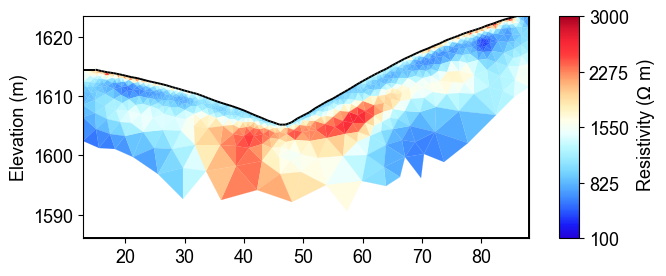

In [ ]:
ax, cbar = pg.show(result.mesh,result.final_models[:,i],pad=0.3,orientation="vertical",cMap=fixed_cmap,cMin= 100,cMax = 3000
                    , ylabel="Elevation (m)",label=' Resistivity ($\Omega$ m)',logScale=False,coverage=result.all_coverage[i]>-1)

In [ ]:
# Full paths to data files
data_files = [os.path.join(data_dir, f) for f in ert_files]

# Measurement times (can be timestamps or any sequential numbers representing time)
measurement_times = [1, 2, 3, 4, 5, 6, 7 ,8, 9, 10, 11, 12]  # Adjust based on your actual acquisition times

# Create a mesh for the inversion (or load an existing one)
data = ert.load(data_files[0])
ert_manager = ert.ERTManager(data)
mesh = ert_manager.createMesh(data=data, quality=34)

# Set up inversion parameters
inversion_params = {
    "lambda_val": 10.0,              # Regularization parameter
    "alpha": 10.0,                   # Temporal regularization parameter
    "decay_rate": 0.0,               # Temporal decay rate
    "method": "cgls",                # Solver method ('cgls', 'lsqr', etc.)
    "model_constraints": (0.001, 1e4), # Min/max resistivity values (ohm-m)
    "max_iterations": 15,            # Maximum iterations
    "absoluteUError": 0.0,           # Absolute data error (V)
    "relativeError": 0.05,           # Relative data error (5%)
    "lambda_rate": 1.0,              # Lambda reduction rate
    "lambda_min": 1.0,               # Minimum lambda value
    "inversion_type": "L1"           # 'L1', 'L2', or 'L1L2'
}

# Create the time-lapse inversion object
inversion = TimeLapseERTInversion(
    data_files=data_files,
    measurement_times=measurement_times,
    mesh=mesh,
    **inversion_params
)

# Run the inversion
print("Starting time-lapse inversion...")
result_L1 = inversion.run()
print("Inversion complete!")

01/06/25 - 20:55:41 - pyGIMLi - INFO - Found 2 regions.
01/06/25 - 20:55:41 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
01/06/25 - 20:55:41 - pyGIMLi - INFO - Found 2 regions.
01/06/25 - 20:55:41 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
01/06/25 - 20:55:41 - pyGIMLi - INFO - Found 2 regions.
01/06/25 - 20:55:41 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
01/06/25 - 20:55:41 - pyGIMLi - INFO - Found 2 regions.
01/06/25 - 20:55:41 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
01/06/25 - 20:55:41 - pyGIMLi - INFO - Found 2 regions.
01/06/25 - 20:55:41 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
01/06/25 - 20:55:41 - pyGIMLi - INFO - Found 2 regions.
01/06/25 - 20:55:41 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
01/06/25 - 20:55:41 - pyGIMLi - IN

Starting time-lapse inversion...


01/06/25 - 20:55:41 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
01/06/25 - 20:55:41 - pyGIMLi - INFO - Found 2 regions.
01/06/25 - 20:55:41 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
01/06/25 - 20:55:41 - pyGIMLi - INFO - Found 2 regions.
01/06/25 - 20:55:41 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
01/06/25 - 20:55:41 - pyGIMLi - INFO - Found 2 regions.
01/06/25 - 20:55:41 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
01/06/25 - 20:55:41 - pyGIMLi - INFO - Creating forward mesh from region infos.
01/06/25 - 20:55:41 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
01/06/25 - 20:55:41 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884


-6.907755278982137 9.210340371976184
------------------- IRLS Iteration: 1 ---------------------------
-------------------ERT Iteration: 0 ---------------------------


01/06/25 - 20:55:51 - pyGIMLi - INFO - Creating forward mesh from region infos.
01/06/25 - 20:55:51 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
01/06/25 - 20:55:51 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884
01/06/25 - 20:55:59 - pyGIMLi - INFO - Creating forward mesh from region infos.
01/06/25 - 20:55:59 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
01/06/25 - 20:55:59 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884
01/06/25 - 20:56:07 - pyGIMLi - INFO - Creating forward mesh from region infos.
01/06/25 - 20:56:07 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
01/06/25 - 20:56:07 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884
01/06/25 - 20:56:16 - pyGIMLi - INFO - Creating forward mesh from region infos.
01/06/25 - 20:56:16 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward tas

ERT chi2: 2345.302026235805
dPhi: 1.0
ERTphi_d: 9774345.116330786, ERTphi_m: 0.0, ERTphi_t: 0.0
-------------------ERT Iteration: 1 ---------------------------
ERT chi2: 360.83050802595733
dPhi: 0.8461475306849549
ERTphi_d: 3629104.6964712283, ERTphi_m: 76395.62319449935, ERTphi_t: 886.3002061166577
-------------------ERT Iteration: 2 ---------------------------
ERT chi2: 71.09959543340517
dPhi: 0.8029556984458465
ERTphi_d: 1024540.6865431041, ERTphi_m: 101060.40715904297, ERTphi_t: 6259.993673305767
-------------------ERT Iteration: 3 ---------------------------
ERT chi2: 34.07793443936954
dPhi: 0.5207014297108293
ERTphi_d: 657974.3478259299, ERTphi_m: 84008.00762661266, ERTphi_t: 11548.446523235334
-------------------ERT Iteration: 4 ---------------------------
ERT chi2: 20.07462561339962
dPhi: 0.41092011755830443
ERTphi_d: 491734.34400837374, ERTphi_m: 77419.35603343608, ERTphi_t: 15220.128438330034
-------------------ERT Iteration: 5 ---------------------------
ERT chi2: 12.6668435

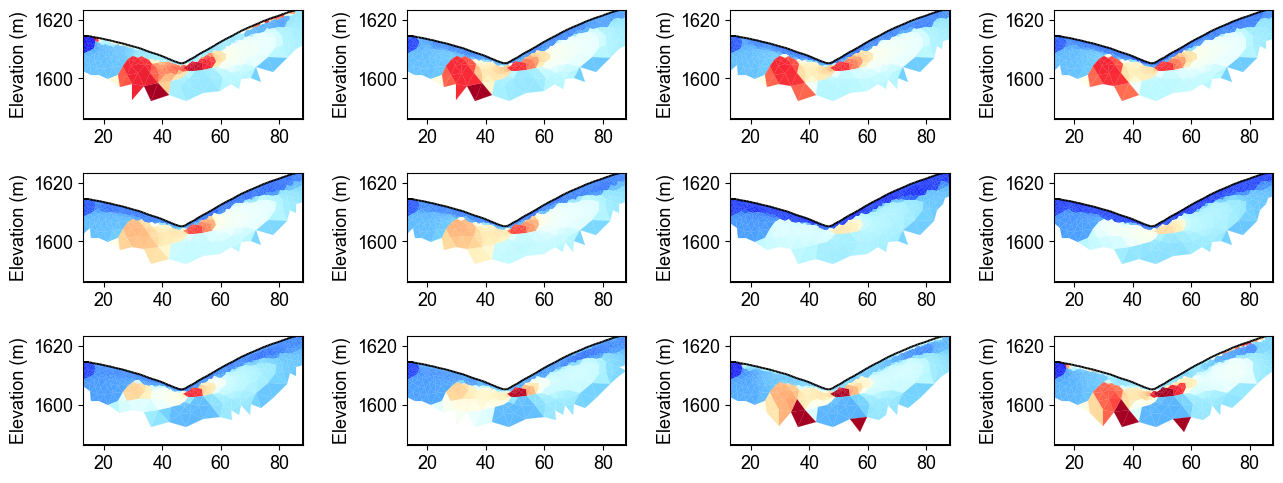

In [ ]:
from palettable.lightbartlein.diverging import BlueDarkRed18_18
fixed_cmap = BlueDarkRed18_18.mpl_colormap

fig = plt.figure(figsize=[16,6])

# True resistivity model
for i in range(12):
    ax = fig.add_subplot(3,4,i+1)
    ax, cbar = pg.show(result_L1.mesh,result_L1.final_models[:,i],pad=0.3,orientation="vertical",cMap=fixed_cmap,cMin= 100,cMax = 3000
                    , ylabel="Elevation (m)",label=' Resistivity ($\Omega$ m)',ax=ax,logScale=False,coverage=result.all_coverage[i]>-1)
    cbar.remove()